In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:\CC\SEM 3\COMP 258 Neural Networks\Assignments\Group Project\Student data.csv")

In [3]:
df.head()

,First Term Gpa,Second Term Gpa,First Language,Funding,School,FastTrack,Coop,Residency,Gender,Previous Education,Age Group,High School,Math Score,English Grade,FirstYearPersistence
0,0,0,1,2,6,2,1,1,2,1,1,59,16,7,1
1,2.5,2,3,4,6,1,2,2,2,1,3,?,?,7,1
2,4.25,3.923077,1,1,6,2,1,1,1,2,3,92,41,9,1
3,3.020833,2.321429,3,4,6,1,2,2,2,2,3,?,?,8,1
4,4.275,4.326923,1,2,6,1,1,1,1,2,3,97,?,9,1


In [4]:
df.shape

(1437, 15)

In [5]:
df.describe()

,Funding,School,FastTrack,Coop,Residency,Gender,FirstYearPersistence
count,1437.000000,1437.0,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000
mean,2.926931,6.0,1.741823,1.695198,1.406402,1.774530,0.791928
std,1.257658,0.0,0.437784,0.460484,0.491332,0.419699,0.406070
min,1.000000,6.0,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,6.0,1.000000,1.000000,1.000000,2.000000,1.000000
50%,2.000000,6.0,2.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,6.0,2.000000,2.000000,2.000000,2.000000,1.000000
max,9.000000,6.0,2.000000,2.000000,2.000000,3.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1437 entries, 0 to 1436
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   First Term Gpa        1437 non-null   object
 1   Second Term Gpa       1437 non-null   object
 2   First Language        1437 non-null   object
 3   Funding               1437 non-null   int64 
 4   School                1437 non-null   int64 
 5   FastTrack             1437 non-null   int64 
 6   Coop                  1437 non-null   int64 
 7   Residency             1437 non-null   int64 
 8   Gender                1437 non-null   int64 
 9   Previous Education    1437 non-null   object
 10  Age Group             1437 non-null   object
 11  High School           1437 non-null   object
 12  Math Score            1437 non-null   object
 13  English Grade         1437 non-null   object
 14  FirstYearPersistence  1437 non-null   int64 
dtypes: int64(7), object(8)
memory usage: 1

### Preprocessing

In [7]:
df = df.apply(pd.to_numeric, errors='coerce', downcast='float')

In [8]:
%matplotlib inline

array([[<Axes: title={'center': 'First Term Gpa'}>,
        <Axes: title={'center': 'Second Term Gpa'}>,
        <Axes: title={'center': 'First Language'}>,
        <Axes: title={'center': 'Funding'}>],
       [<Axes: title={'center': 'School'}>,
        <Axes: title={'center': 'FastTrack'}>,
        <Axes: title={'center': 'Coop'}>,
        <Axes: title={'center': 'Residency'}>],
       [<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Previous Education'}>,
        <Axes: title={'center': 'Age Group'}>,
        <Axes: title={'center': 'High School'}>],
       [<Axes: title={'center': 'Math Score'}>,
        <Axes: title={'center': 'English Grade'}>,
        <Axes: title={'center': 'FirstYearPersistence'}>, <Axes: >]],
      dtype=object)

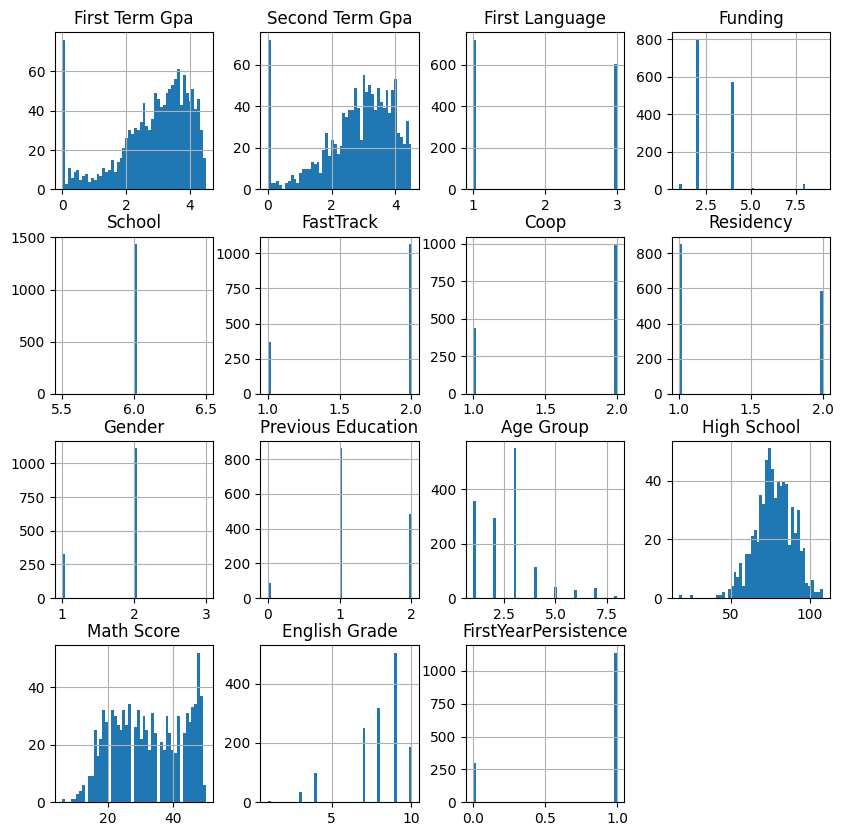

In [9]:
df.hist(bins=50, figsize=(10, 10))

In [10]:
corr_matrix = df.corr()

In [11]:
corr_matrix['FirstYearPersistence'].sort_values(ascending=False)

FirstYearPersistence    1.000000
First Term Gpa          0.551846
Second Term Gpa         0.394999
High School             0.263660
Math Score              0.237287
Residency               0.211216
Funding                 0.192473
First Language          0.186825
Previous Education      0.127034
Age Group               0.115198
English Grade           0.041163
Coop                    0.003219
Gender                 -0.075247
FastTrack              -0.180958
School                       NaN
Name: FirstYearPersistence, dtype: float64

In [12]:
df.drop(['School', 'Coop', 'Gender', 'English Grade', 'Age Group', 'Previous Education'], axis=1, inplace=True)

In [13]:
df.columns

Index(['First Term Gpa', 'Second Term Gpa', 'First Language', 'Funding',
       'FastTrack', 'Residency', 'High School', 'Math Score',
       'FirstYearPersistence'],
      dtype='object')

In [14]:
df.replace('?', np.nan, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1437 entries, 0 to 1436
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   First Term Gpa        1420 non-null   float32
 1   Second Term Gpa       1277 non-null   float32
 2   First Language        1326 non-null   float32
 3   Funding               1437 non-null   float32
 4   FastTrack             1437 non-null   float32
 5   Residency             1437 non-null   float32
 6   High School           694 non-null    float32
 7   Math Score            975 non-null    float32
 8   FirstYearPersistence  1437 non-null   float32
dtypes: float32(9)
memory usage: 50.6 KB


In [16]:
df.head()

,First Term Gpa,Second Term Gpa,First Language,Funding,FastTrack,Residency,High School,Math Score,FirstYearPersistence
0,0.000000,0.000000,1.0,2.0,2.0,1.0,59.0,16.0,1.0
1,2.500000,2.000000,3.0,4.0,1.0,2.0,NaN,NaN,1.0
2,4.250000,3.923077,1.0,1.0,2.0,1.0,92.0,41.0,1.0
3,3.020833,2.321429,3.0,4.0,1.0,2.0,NaN,NaN,1.0
4,4.275000,4.326923,1.0,2.0,1.0,1.0,97.0,NaN,1.0


In [17]:
df.shape

(1437, 9)

In [18]:
X = df.iloc[:, :8]
y = df.iloc[:,8]

In [19]:
print(y.unique())
print(y.value_counts())

[1. 0.]
1.0    1138
0.0     299
Name: FirstYearPersistence, dtype: int64


In [20]:
from sklearn.impute import SimpleImputer

In [21]:
impute = SimpleImputer(missing_values=np.nan, strategy='mean', fill_value=None)

In [22]:
imputed_X = impute.fit_transform(X)

In [23]:
imputed_X

array([[ 0.       ,  0.       ,  1.       , ...,  1.       , 59.       ,
        16.       ],
       [ 2.5      ,  2.       ,  3.       , ...,  2.       , 77.15274  ,
        32.55795  ],
       [ 4.25     ,  3.923077 ,  1.       , ...,  1.       , 92.       ,
        41.       ],
       ...,
       [ 2.020833 ,  2.45     ,  1.       , ...,  1.       , 78.       ,
        18.       ],
       [ 4.021739 ,  4.357143 ,  1.9110105, ...,  2.       , 77.15274  ,
        46.       ],
       [ 2.133333 ,  3.205882 ,  1.       , ...,  1.       , 81.       ,
        27.       ]], dtype=float32)

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
scaled_X = scaler.fit_transform(imputed_X)

In [27]:
scaled_X

array([[-2.4373019e+00, -2.6517158e+00, -9.5360339e-01, ...,
        -8.2743126e-01, -2.1651967e+00, -1.8779671e+00],
       [-2.9636785e-01, -7.7118337e-01,  1.1399034e+00, ...,
         1.2085596e+00,  1.5705081e-07,  2.6796295e-08],
       [ 1.2022859e+00,  1.0370210e+00, -9.5360339e-01, ...,
        -8.2743126e-01,  1.7709305e+00,  9.5747930e-01],
       ...,
       [-7.0671380e-01, -3.4806353e-01, -9.5360339e-01, ...,
        -8.2743126e-01,  1.0105838e-01, -1.6511314e+00],
       [ 1.0068092e+00,  1.4451585e+00, -5.2448691e-08, ...,
         1.2085596e+00,  1.5705081e-07,  1.5245686e+00],
       [-6.1037183e-01,  3.6266676e-01, -9.5360339e-01, ...,
        -8.2743126e-01,  4.5888817e-01, -6.3037068e-01]], dtype=float32)

### train test split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=42)

In [30]:
X_train, X_test, y_train, y_test

(array([[ 1.1459458e+00,  1.0858423e+00, -9.5360339e-01, ...,
         -8.2743126e-01,  5.7816476e-01, -2.9011708e-01],
        [-5.3722292e-01, -4.2476986e-02, -9.5360339e-01, ...,
         -8.2743126e-01, -1.9266435e+00, -1.5377135e+00],
        [-5.1977003e-01,  2.5863186e-01,  1.1399034e+00, ...,
         -8.2743126e-01,  5.7816476e-01,  6.1722577e-01],
        ...,
        [-2.2500367e-01,  4.2508934e-02,  1.1399034e+00, ...,
          1.2085596e+00,  1.5705081e-07,  2.6796295e-08],
        [ 4.6181653e-02,  4.5362776e-03, -9.5360339e-01, ...,
         -8.2743126e-01, -3.7604797e-01,  3.9039007e-01],
        [ 5.3859633e-01,  5.9647608e-01,  1.1399034e+00, ...,
          1.2085596e+00,  1.5705081e-07,  2.6796295e-08]], dtype=float32),
 array([[-5.7040739e-01, -1.1786317e+00, -9.5360339e-01, ...,
         -8.2743126e-01, -1.4495373e+00,  2.6796295e-08],
        [-4.8477009e-01, -8.5294604e-01, -9.5360339e-01, ...,
         -8.2743126e-01, -6.1460114e-01, -9.7062421e-01],
        [-

In [31]:
y_test.value_counts()

1.0    219
0.0     69
Name: FirstYearPersistence, dtype: int64

### Model Creation

In [32]:
import tensorflow as tf

In [33]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(9, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 81        
                                                                 
 dense_1 (Dense)             (None, 6)                 60        
                                                                 
 dense_2 (Dense)             (None, 4)                 28        
                                                                 
 dense_3 (Dense)             (None, 2)                 10        
                                                                 
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
Total params: 182 (728.00 Byte)
Trainable params: 182 (728.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
36/36 [==============================] - 0s 2ms/step - loss: 0.3282 - accuracy: 0.8721
Epoch 2/100
36/36 [==============================] - 0s 2ms/step - loss: 0.3282 - accuracy: 0.8738
Epoch 3/100
36/36 [==============================] - 0s 2ms/step - loss: 0.3276 - accuracy: 0.8747
Epoch 4/100
36/36 [==============================] - 0s 2ms/step - loss: 0.3275 - accuracy: 0.8747
Epoch 5/100
36/36 [==============================] - 0s 2ms/step - loss: 0.3268 - accuracy: 0.8738
Epoch 6/100
36/36 [==============================] - 0s 2ms/step - loss: 0.3279 - accuracy: 0.8721
Epoch 7/100
36/36 [==============================] - 0s 2ms/step - loss: 0.3266 - accuracy: 0.8738
Epoch 8/100
36/36 [==============================] - 0s 2ms/step - loss: 0.3267 - accuracy: 0.8738
Epoch 9/100
36/36 [==============================] - 0s 2ms/step - loss: 0.3259 - accuracy: 0.8755
Epoch 10/100
36/36 [==============================] - 0s 2ms/step - loss: 0.3256 - accuracy: 0.8738
Epoch 11/

36/36 [==============================] - 0s 4ms/step - loss: 0.3142 - accuracy: 0.8764
Epoch 84/100
36/36 [==============================] - 0s 3ms/step - loss: 0.3140 - accuracy: 0.8764
Epoch 85/100
36/36 [==============================] - 0s 4ms/step - loss: 0.3135 - accuracy: 0.8773
Epoch 86/100
36/36 [==============================] - 0s 4ms/step - loss: 0.3132 - accuracy: 0.8747
Epoch 87/100
36/36 [==============================] - 0s 3ms/step - loss: 0.3127 - accuracy: 0.8755
Epoch 88/100
36/36 [==============================] - 0s 4ms/step - loss: 0.3133 - accuracy: 0.8729
Epoch 89/100
36/36 [==============================] - 0s 4ms/step - loss: 0.3128 - accuracy: 0.8738
Epoch 90/100
36/36 [==============================] - 0s 4ms/step - loss: 0.3125 - accuracy: 0.8773
Epoch 91/100
36/36 [==============================] - 0s 4ms/step - loss: 0.3123 - accuracy: 0.8747
Epoch 92/100
36/36 [==============================] - 0s 3ms/step - loss: 0.3124 - accuracy: 0.8764
Epoch 93/100


In [39]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)

In [40]:
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 87.55%
Testing Accuracy: 84.03%
